<a href="https://colab.research.google.com/github/RodrigooRich/prestadoreshospitalares/blob/main/prestadoreshospitalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação das Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
import io
import seaborn as sns



Importa a biblioteca drive do Google Colab e monta o Google Drive no diretório /content/drive do ambiente do Colab.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Este comando lê um arquivo Excel chamado prestadores_hospitalares_PE.xlsx localizado no diretório

In [3]:
tab = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/prestadores_hospitalares_PE.xlsx')


**Passo 2: Entendimento dos Dados da Tabela**

Total de Colunas da nossa tabela;
Mais de 100 mil Registros

In [4]:
tab.shape


(1012210, 8)

As 5 linhas iniciais da tabela

In [5]:
tab.head()

,Plano,Id_Plano,Contrato,Estabelecimento,Classificação,Disponibilidade,Municipio,UF
0,SUL AMERICA SEGURADORA DE SAUDE S.A.,1506633,INDIVIDUAL,PRONTOLINDA LTDA,Assistencia Hospitalar,Parcial,OLINDA,PE
1,SUL AMERICA SEGURADORA DE SAUDE S.A.,1506133,INDIVIDUAL,PRONTOLINDA LTDA,Assistencia Hospitalar,Parcial,OLINDA,PE
2,SUL AMERICA SEGURADORA DE SAUDE S.A.,1506139,INDIVIDUAL,PRONTOLINDA LTDA,Assistencia Hospitalar,Parcial,OLINDA,PE
3,SUL AMERICA SEGURADORA DE SAUDE S.A.,1506125,INDIVIDUAL,PRONTOLINDA LTDA,Assistencia Hospitalar,Parcial,OLINDA,PE
4,SUL AMERICA SEGURADORA DE SAUDE S.A.,1506162,COLETIVO,PRONTOLINDA LTDA,Assistencia Hospitalar,Parcial,OLINDA,PE


As 5 linhas finais da tabela

In [6]:
tab.tail()

,Plano,Id_Plano,Contrato,Estabelecimento,Classificação,Disponibilidade,Municipio,UF
1012205,BRADESCO SAUDE OPERADORA DE PLANOS S A,18664738,COLETIVO,ECO CLINICA LTDA,Assistencia Hospitalar,Parcial,AFOGADOS DA INGAZEIRA,PE
1012206,ALICE OPERADORA LTDA.,18400822,INDIVIDUAL,HOSPITAIS ASSOCIADOS DE PERNAMBUCO LTDA,Assistencia Hospitalar,Total,RECIFE,PE
1012207,ASSOCIACAO PETROBRAS DE SAUDE APS,18366236,COLETIVO,OTORRINOS RECIFE LTDA,Assistencia Hospitalar,Parcial,RECIFE,PE
1012208,INTEGRA ASSISTENCIA MEDICA SA,18591145,COLETIVO,SEOPE SERVICO OFTALMOLOGICO DE PERNAMBUCO LTDA,Assistencia Hospitalar,Parcial,RECIFE,PE
1012209,REAL GRANDEZA SAUDE,18586825,COLETIVO,INSTITUTO PERNANBUCANO DE CIRURGIA E ORTOPEDIA...,Assistencia Hospitalar,Total,CARUARU,PE


Exibe informações sobre o DataFrame tab, como os tipos de dados de cada coluna e o número de entradas não nulas em cada coluna.

In [7]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012210 entries, 0 to 1012209
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Plano            1012210 non-null  object
 1   Id_Plano         1012210 non-null  int64 
 2   Contrato         1012210 non-null  object
 3   Estabelecimento  1012210 non-null  object
 4   Classificação    1012210 non-null  object
 5   Disponibilidade  1012210 non-null  object
 6   Municipio        1012210 non-null  object
 7   UF               1012210 non-null  object
dtypes: int64(1), object(7)
memory usage: 61.8+ MB


Resumo estatistico apenas dar as variáveis de interesse

In [12]:
tab.iloc[:,5:].describe()

,Disponibilidade,Municipio,UF
count,1012210,1012210,1012210
unique,3,58,1
top,Parcial,RECIFE,PE
freq,572308,397015,1012210


Dados faltantes; não tem!

In [11]:
tab.isna().sum()

Plano              0
Id_Plano           0
Contrato           0
Estabelecimento    0
Classificação      0
Disponibilidade    0
Municipio          0
UF                 0
dtype: int64

Números de valores únicos do Dataframe para cada coluna.

In [10]:
tab.nunique()

Plano                315
Id_Plano           19014
Contrato               2
Estabelecimento     2476
Classificação          4
Disponibilidade        3
Municipio             58
UF                     1
dtype: int64

Exemplo dos "valores" únicos de Municipios existentes da tabela, 48 municipios!

In [13]:
tab['Municipio'].unique()

array(['OLINDA', 'RECIFE', 'VITORIA DE SANTO ANTAO', 'SERRA TALHADA',
       'SALGUEIRO', 'PETROLINA', 'PESQUEIRA', 'JABOATAO DOS GUARARAPES',
       'PAULISTA', 'GARANHUNS', 'GOIANA', 'CAMARAGIBE', 'CARUARU',
       'CABO DE SANTO AGOSTINHO', 'BELO JARDIM', 'ARCOVERDE', 'AGRESTINA',
       'PAUDALHO', 'TIMBAUBA', 'SURUBIM', 'SERTANIA', 'SAO JOSE DO EGITO',
       'SAO JOSE DO BELMONTE', 'SANTA CRUZ DO CAPIBARIBE', 'RIBEIRAO',
       'PETROLANDIA', 'PALMARES', 'LIMOEIRO', 'IGARASSU',
       'ILHA DE ITAMARACA', 'GRAVATA', 'ESCADA', 'FLORESTA', 'CARPINA',
       'BEZERROS', 'BODOCO', 'BELEM DO SAO FRANCISCO', 'ARARIPINA',
       'AFOGADOS DA INGAZEIRA', 'SAIRE', 'OURICURI', 'MORENO',
       'SANTA CRUZ', 'TABIRA', 'BARREIROS', 'CABROBO', 'CUSTODIA',
       'TRINDADE', 'SAO LOURENCO DA MATA', 'ABREU E LIMA', 'VERTENTES',
       'BONITO', 'MIRANDIBA', 'CUPIRA', 'SANTA MARIA DA BOA VISTA',
       'ALIANCA', 'NAZARE DA MATA', 'SAO JOAO'], dtype=object)

**Passo 3: Gráficos para entendermos as variáveis**

**Variáveis Qualitativas**

Número de ocorrências de cada valor na coluna 'Id_Plano' do DataFrame tab e exibe os resultados.

In [14]:
pd.DataFrame(tab['Id_Plano'].value_counts())

,count
Id_Plano,
15238651,724
15238648,724
15238654,723
15238681,721
15238675,721
...,...
18673179,1
1446496,1
1487631,1


Número de ocorrências de cada valor na coluna 'Plano' do DataFrame tab e exibe os resultados

In [15]:
pd.DataFrame(tab['Plano'].value_counts())

,count
Plano,
AMIL ASSISTENCIA MEDICA INTERNACIONAL S.A.,52925
UNIMED NOVA FRIBURGOSOC.COOP.SERV.MED.HOSP.LTDA.,50229
SUL AMERICA COMPANHIA DE SEGURO SAUDE,47269
UNIMED NACIONAL COOPERATIVA CENTRAL,46140
BRADESCO SAUDE S.A.,41185
...,...
UNIMED SETE LAGOAS COOPERATIVA TRABALHO MEDICO,2
ITAIPU BINACIONAL,1
ASSOCIACAO CIVIL PROSAUDE DOS SERVIDORES DA UNIVERSIDADE ESTADUAL DE PONTA GROSSA,1


Número de ocorrências de cada valor na coluna 'Contrato' do DataFrame tab e exibe os resultados.

In [16]:
pd.DataFrame(tab['Contrato'].value_counts())

,count
Contrato,
COLETIVO,613359
INDIVIDUAL,398851


Número de ocorrências de cada valor na coluna 'Classificação' do DataFrame tab e exibe os resultados.

In [17]:
pd.DataFrame(tab['Classificação'].value_counts())

,count
Classificação,
Assistencia Hospitalar,968392
Demais Estabelecimentos,29786
Servicos de Alta Complexidade,13858
Nao informado,174


Número de ocorrências de cada valor na coluna 'Estabelecimento' do DataFrame tab e exibe os resultados.

In [18]:
pd.DataFrame(tab['Estabelecimento'].value_counts())

,count
Estabelecimento,
HOSPITAL MEMORIAL PETROLINA,11446
HOSPITAL SAMARITANO,11387
HOSPITAL SANTA GENOVEVA LTDA,10725
INSTITUTO ALCIDES D ANDRADE LIMA,9945
HOSPITAL MEMORIAL GUARARAPES,9923
...,...
UNIDADE DE FRATURA,1
SPMH SOCIEDADE PERNAMBUCANA MEDICO HOSPITALAR,1
HOSP. ESPERANCA S.A. HOSP. SAO MARCOS,1


Número de ocorrências de cada valor na coluna 'Disponibilidade' do DataFrame tab e exibe os resultados.

In [19]:
pd.DataFrame(tab['Disponibilidade'].value_counts())

,count
Disponibilidade,
Parcial,572308
Total,410794
Nao inform,29108


Número de ocorrências de cada valor na coluna 'Municipio' do DataFrame tab e exibe os resultados.

In [20]:
pd.DataFrame(tab['Municipio'].value_counts())

,count
Municipio,
RECIFE,397015
PETROLINA,85256
JABOATAO DOS GUARARAPES,57013
CARUARU,50735
GARANHUNS,48576
OLINDA,40204
SERRA TALHADA,32068
CABO DE SANTO AGOSTINHO,29656
VITORIA DE SANTO ANTAO,29198


Gráfico da coluna 'Plano' com mais elementos.

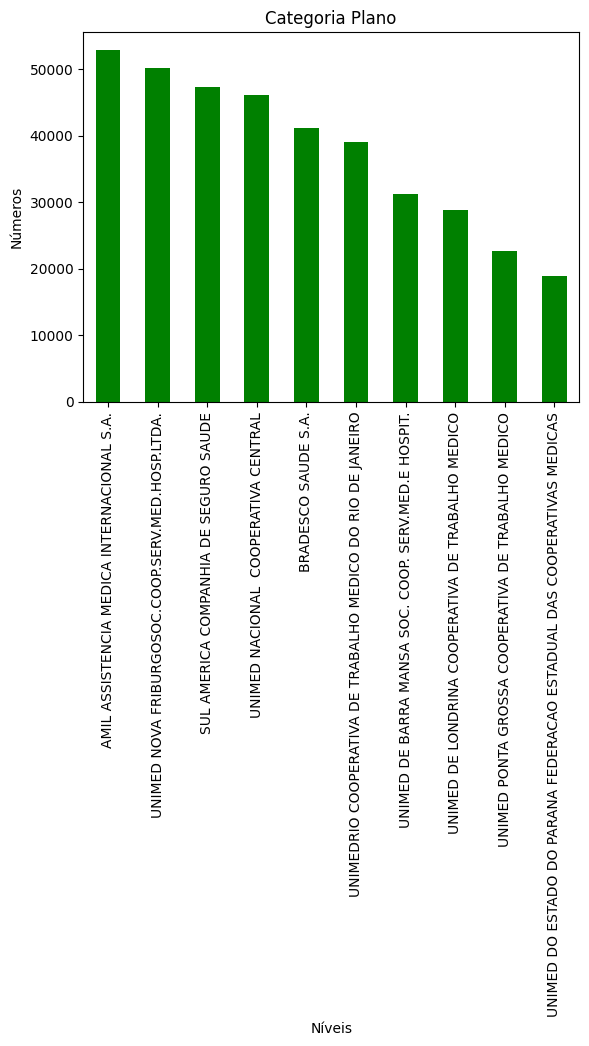

In [21]:
ax = tab['Plano'].value_counts() \
      .head(10) \
      .plot(kind='bar', title='Categoria Plano', color='green')
ax.set_xlabel('Níveis')
ax.set_ylabel('Números');

Gráfico da coluna 'Contrato' com mais elementos.

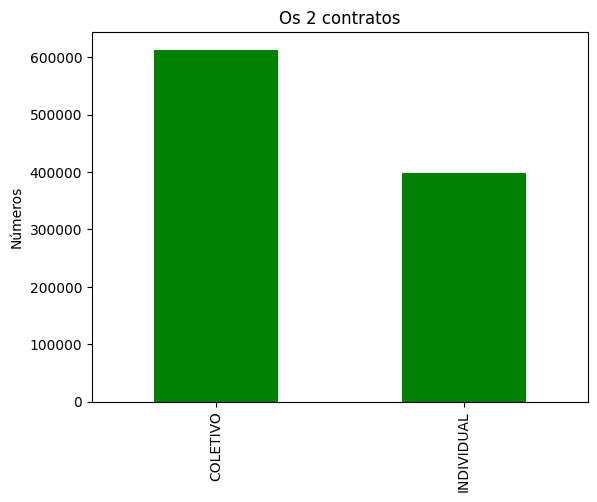

In [22]:
ax = tab['Contrato'].value_counts() \
      .head(10) \
      .plot(kind='bar', title='Os 2 contratos', color='green')
ax.set_xlabel('')
ax.set_ylabel('Números');

Gráfico da coluna 'Estabelecimento' com mais elementos;
Hospital Memorial de Petrolina e Unimed Recife bem a frente dos números

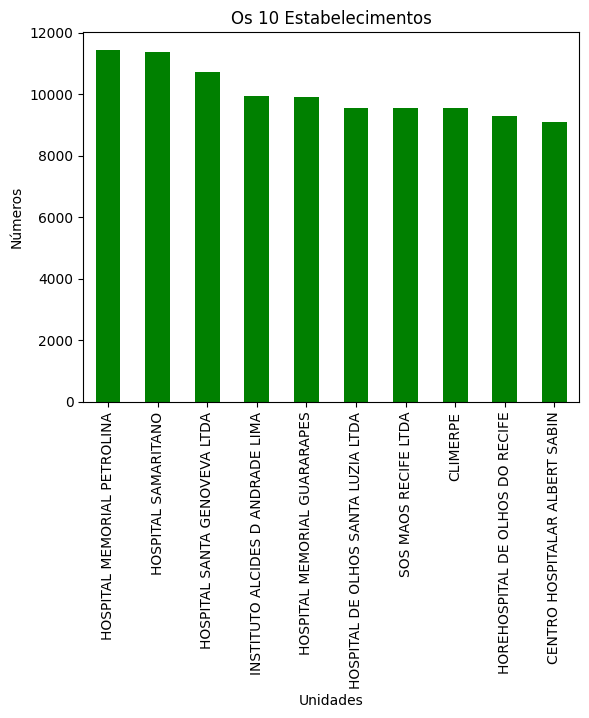

In [23]:
ax = tab['Estabelecimento'].value_counts() \
      .head(10) \
      .plot(kind='bar', title='Os 10 Estabelecimentos', color='green')
ax.set_xlabel('Unidades')
ax.set_ylabel('Números');


Gráfico da coluna 'Classificação' com mais elementos.


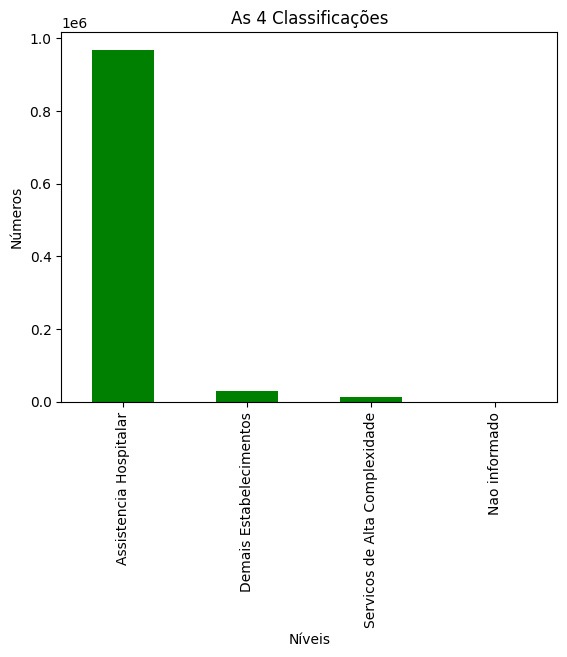

In [24]:
ax = tab['Classificação'].value_counts() \
      .head(10) \
      .plot(kind='bar', title='As 4 Classificações', color='green')
ax.set_xlabel('Níveis')
ax.set_ylabel('Números');

Gráfico da coluna 'Municipio' com mais elementos

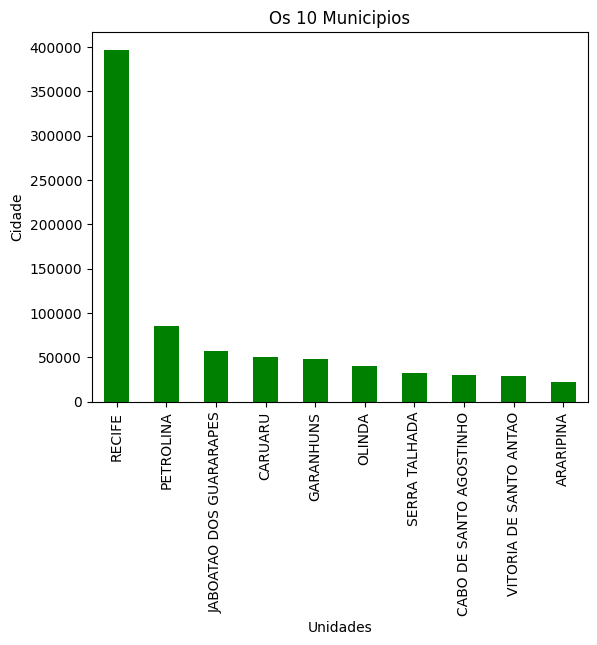

In [25]:
ax = tab['Municipio'].value_counts() \
      .head(10) \
      .plot(kind='bar', title='Os 10 Municipios', color='green')
ax.set_xlabel('Unidades')
ax.set_ylabel('Cidade');

Esse gráfico não é a melhor forma de visualização

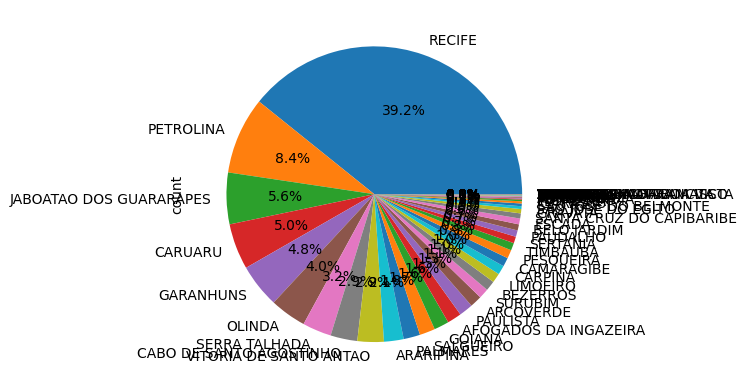

In [26]:
tab['Municipio'].value_counts().plot(kind='pie', autopct='%1.1f%%');

In [27]:
municipio_counts = tab['Municipio'].value_counts().sort_values(ascending=False)

In [28]:
top_municipios = 20

Melhor visualização dos municipios com o Kind ='barh'

<Axes: ylabel='Municipio'>

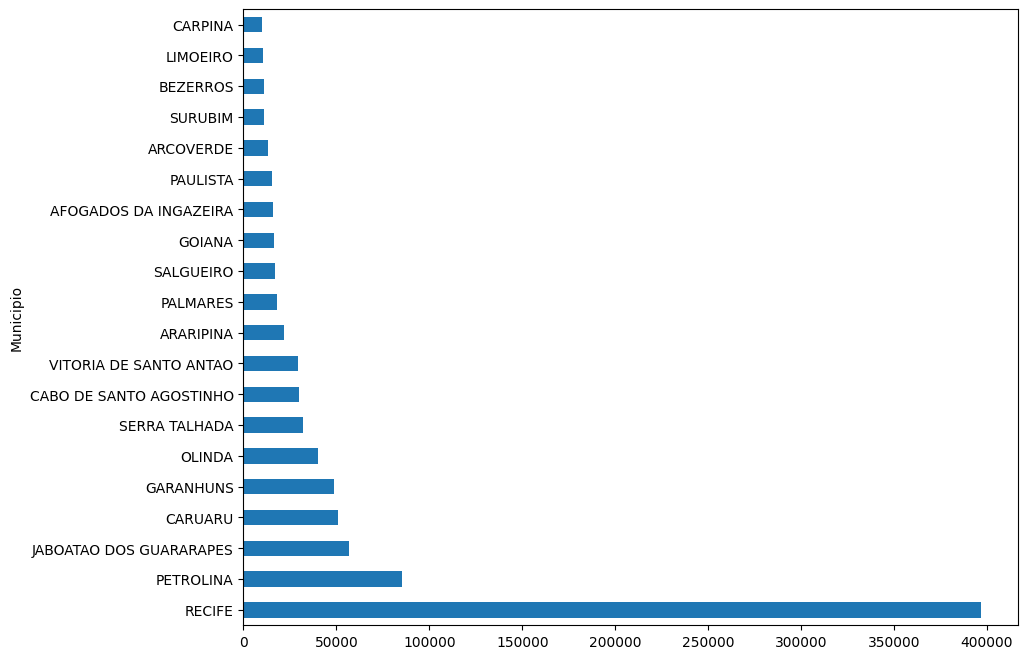

In [29]:
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura
municipio_counts[:top_municipios].plot(kind='barh')

Este comando imprime as variáveis (ou colunas) do DataFrame tab.

In [30]:
variaveis = tab.columns
print(variaveis)

Index(['Plano', 'Id_Plano', 'Contrato', 'Estabelecimento', 'Classificação',
       'Disponibilidade', 'Municipio', 'UF'],
      dtype='object')


In [31]:
print("Variáveis:")
for variavel in variaveis:
  print(f"- {variavel}")


Variáveis:
- Plano
- Id_Plano
- Contrato
- Estabelecimento
- Classificação
- Disponibilidade
- Municipio
- UF


In [32]:
tipos_dados = {}

In [33]:
for coluna in tab.columns:
  # Análise do conteúdo da variável
  conteudo = tab[coluna]

  # Verificação do tipo de dado
  if pd.api.types.is_numeric_dtype(conteudo):
    # Verificação se é inteiro ou decimal
    if pd.api.types.is_integer_dtype(conteudo):
      tipo = "Numérico (Inteiro)"
    else:
      tipo = "Numérico (Decimal)"
  elif pd.api.types.is_categorical_dtype(conteudo):
    # Verificação se é nominal ou ordinal
    if pd.api.types.is_object_dtype(conteudo):
      tipo = "Categórico (Nominal)"
    else:
      tipo = "Categórico (Ordinal)"
  elif pd.api.types.is_string_dtype(conteudo):
    tipo = "Texto (String)"
  elif pd.api.types.is_datetime_dtype(conteudo):
    tipo = "Data/Tempo"
  else:
    tipo = "Desconhecido"

  # Armazenamento do tipo de dado no dicionário
  tipos_dados[coluna] = tipo


Imprimir os tipos de dados de cada variável (ou coluna) em uma tabela formatada em Markdown.

In [34]:
print("### Tipos de Dados das Variáveis:")
print("| Nome da Variável | Tipo de Dado |")
print("|---|---|")
for coluna, tipo_dado in tipos_dados.items():
  print(f"| {coluna} | {tipo_dado} |")

### Tipos de Dados das Variáveis:
| Nome da Variável | Tipo de Dado |
|---|---|
| Plano | Texto (String) |
| Id_Plano | Numérico (Inteiro) |
| Contrato | Texto (String) |
| Estabelecimento | Texto (String) |
| Classificação | Texto (String) |
| Disponibilidade | Texto (String) |
| Municipio | Texto (String) |
| UF | Texto (String) |


Id_Plano	Numérico (Inteiro)	Identificador único para cada plano de saúde presente no dataset.

Plano	Categórico (Nominal)	Nome do plano de saúde, como "Amil", "Bradesco Saúde", etc.

Contrato	Texto (String)	Número do contrato entre o plano de saúde e o prestador de serviços.

Estabelecimento	Categórico (Nominal)	Nome do estabelecimento de saúde, como hospital, clínica, laboratório, etc.

Classificação	Categórico (Ordinal)	Nível de classificação do estabelecimento de saúde, como "Pequeno Porte", "Médio Porte", etc.

Disponibilidade	Categórico (Nominal)	Indica se o estabelecimento de saúde está disponível para atender pacientes, como "Sim", "Não", etc.

Municipio	Categórico (Nominal)	Município onde o estabelecimento de saúde está localizado.